# Classificação de Flores Iris com Random Forest, KNN e SVM

## 1. Importação das Bibliotecas

In [98]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

## 2. Carregamento do Conjunto de Dados Iris


In [99]:
dados = load_iris()
caracteristicas = dados.data
classes = dados.target

In [100]:
df= pd.DataFrame(caracteristicas, columns=dados.feature_names)
df['classe'] = classes 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classe
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


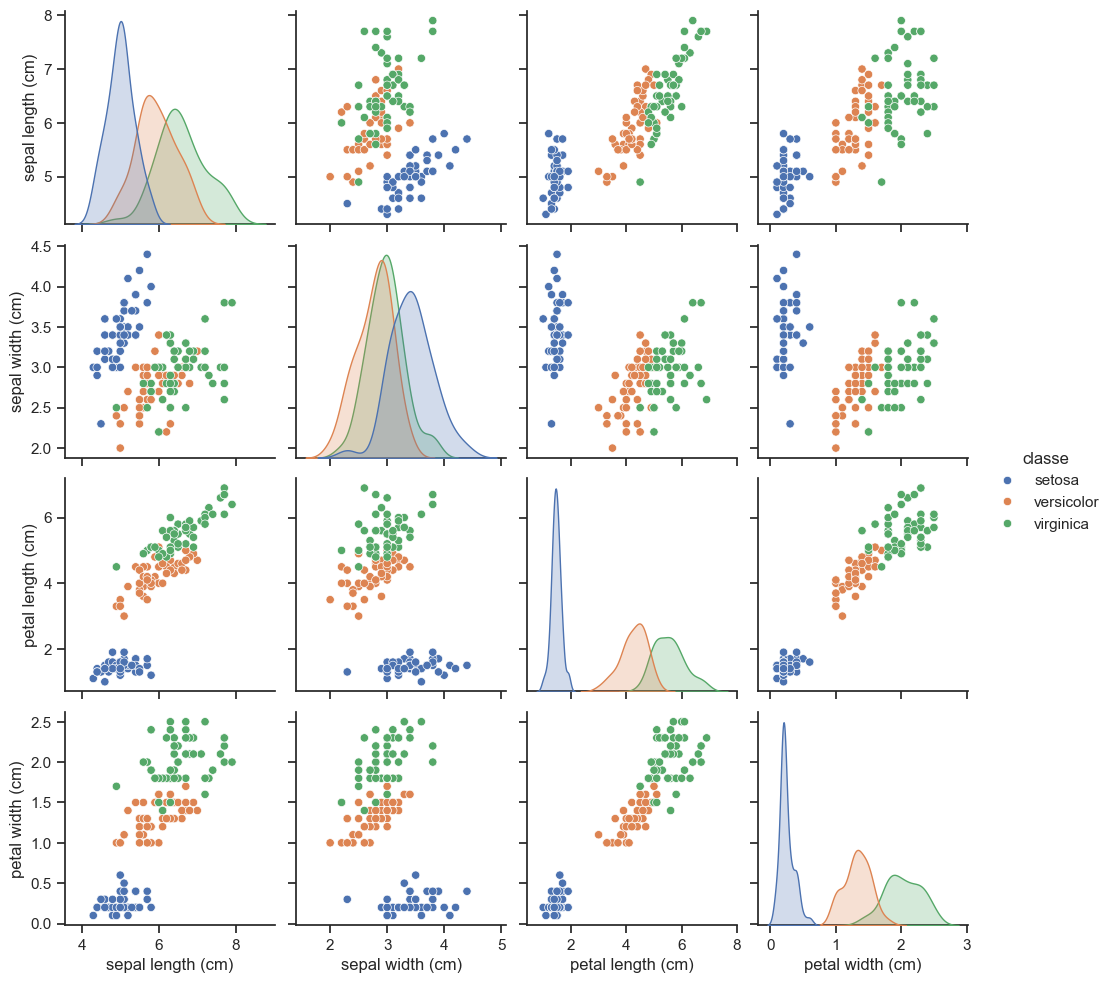

In [101]:
sns.set(style="ticks")
df = pd.DataFrame(caracteristicas, columns=dados.feature_names)
df['classe'] = dados.target_names[classes]

sns.pairplot(df, hue='classe', diag_kind='kde')
plt.show()

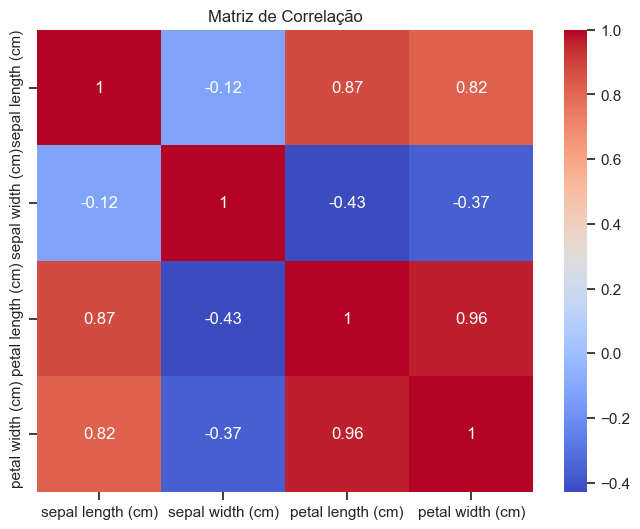

In [102]:
plt.figure(figsize=(8, 6))
matriz_correlacao = pd.DataFrame(caracteristicas, columns=dados.feature_names).corr()
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

## 3. Divisão dos Dados em Treino e Teste

In [103]:
caracteristicas_treino, caracteristicas_teste, classes_treino, classes_teste = train_test_split(caracteristicas, classes, test_size=0.30, random_state=42)

## 4. Treinamento com Random Forest

In [104]:
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(caracteristicas_treino, classes_treino)

RandomForestClassifier(random_state=42)

In [105]:
previsoes = modelo.predict(caracteristicas_teste)

## 5. Avaliação do Modelo Random Forest

In [106]:
acuracia = accuracy_score(classes_teste, previsoes)
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(classification_report(classes_teste, previsoes, target_names=dados.target_names))


Acurácia: 1.00
Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



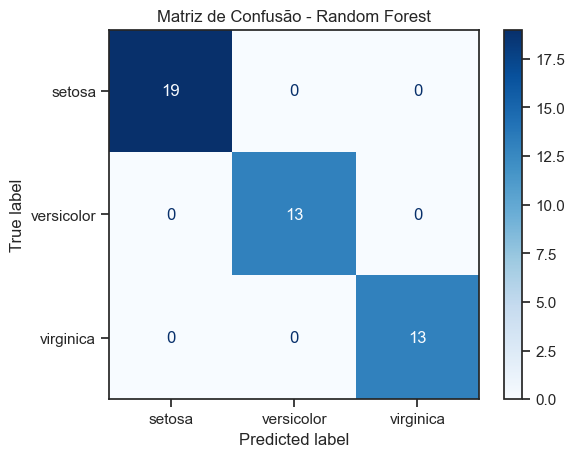

In [107]:
cm = confusion_matrix(classes_teste, previsoes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dados.target_names)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Random Forest")
plt.show()

## 6. Padronização dos Dados para KNN

In [108]:

scaler = StandardScaler()

caracteristicas_treino_knn = caracteristicas_treino
caracteristicas_treino_knn = scaler.fit_transform(caracteristicas_treino_knn)

caracteristicas_teste_knn = caracteristicas_teste
caracteristicas_teste_knn = scaler.transform(caracteristicas_teste_knn)

## 7. Treinamento com KNN

In [109]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(caracteristicas_treino_knn, classes_treino)

y_pred = knn.predict(caracteristicas_teste_knn)

## 8. Avaliação do Modelo KNN

In [110]:
print("Acurácia:", accuracy_score(classes_teste, y_pred))
print("Relatório de Classificação:\n", classification_report(classes_teste, y_pred))

Acurácia: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 9. Comparação entre Random Forest e KNN

In [111]:
print("Random Forest:")
print(f"Acurácia: {accuracy_score(classes_teste, previsoes):.2f}")
print(classification_report(classes_teste, previsoes))

print("\nKNN:")
print(f"Acurácia: {accuracy_score(classes_teste, y_pred):.2f}")
print(classification_report(classes_teste, y_pred))

Random Forest:
Acurácia: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


KNN:
Acurácia: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Padronização dos dados SVM

In [112]:
caracteristicas_treino_svm = scaler.fit_transform(caracteristicas_treino)
caracteristicas_teste_svm = scaler.transform(caracteristicas_teste)

## Treinamento do modelo SVM

In [113]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(caracteristicas_treino_svm, classes_treino)
y_pred_svm = svm.predict(caracteristicas_teste_svm)

## Avaliação do modelo SVM

In [114]:
print("SVM:")
print(f"Acurácia: {accuracy_score(classes_teste, y_pred_svm):.2f}")
print(classification_report(classes_teste, y_pred_svm, target_names=dados.target_names))

SVM:
Acurácia: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Avaliação dos modelos

In [115]:
print("Random Forest:")
print(f"Acurácia: {accuracy_score(classes_teste, previsoes):.2f}")
print(classification_report(classes_teste, previsoes))

print("\nKNN:")
print(f"Acurácia: {accuracy_score(classes_teste, y_pred):.2f}")
print(classification_report(classes_teste, y_pred))

print("\nSVM:")
print(f"Acurácia: {accuracy_score(classes_teste, y_pred_svm):.2f}")
print(classification_report(classes_teste, y_pred_svm))

Random Forest:
Acurácia: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


KNN:
Acurácia: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


SVM:
Acurácia: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
   

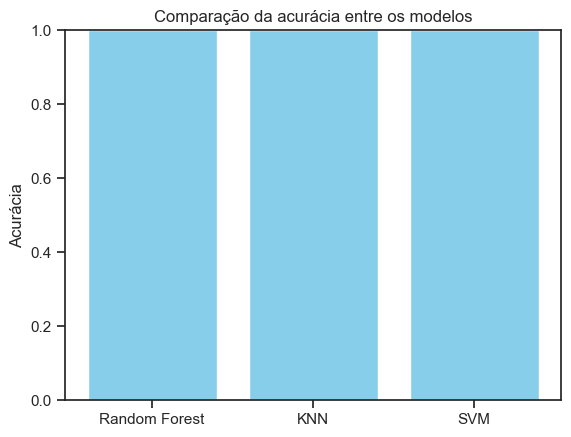

In [116]:
modelos = ['Random Forest', 'KNN', 'SVM']
acuracias = [
    accuracy_score(classes_teste, previsoes),
    accuracy_score(classes_teste, y_pred),
    accuracy_score(classes_teste, y_pred_svm)
]

plt.Figure(figsize=(8, 5))
plt.bar(modelos, acuracias, color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Acurácia')
plt.title('Comparação da acurácia entre os modelos')
plt.show()